# Thông tin chung

**Mục tiêu**

- Giới thiệu về bài toán phân lớp dữ liệu.
- Giới thiệu hai thuật toán phân lớp Random Forest và KNN.

**Kết quả đạt được**

Sinh viên sau khi thực hành sẽ:
- Nắm vững được hai thuật toán phân lớp dữ liệu.
- Cài đặt được các ví dụ thực hành

**Thời gian thực hành:** 3 tiết

**Công cụ thực hành:** Google Colab, Anaconda

# Nội dung lý thuyết

Phân lớp _(classification)_ dựa vào sự phân chia các đối tượng vào các lớp đã được xác định sẵn.

Một số thuật toán phân lớp phổ biến:

- Cây quyết định (decision tree)
- Naive Bayesian
- K-láng giềng gần nhất (K-nearest neighbor)
- Máy vector hỗ trợ (SVM)
- Mạng neural (neural network)

**Thuật toán K-nearest neighbor (KNN)**:

- Là một thuật toán thuộc nhóm học có giám sát
- Dựa vào khoảng cách của các điểm láng giềng để phân lớp dữ liệu.

# Nội dung thực hành

## Mô tả bài toán

Cho dữ liệu hoa Iris gồm 5 thuộc tính sau:

- sepal_length: chiều dài đài hoa (cm)
- sepal_width: chiều rộng đài hoa (cm)
- petal_length: chiều dài cánh hoa (cm)
- petal_width: chiều rộng cánh hoa (cm)
- species: loại/lớp hoa

Quan sát ta thấy có ba loại hoa Iris là:  setosa, versicolour và viginica.

In [70]:
import pandas as pd

iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [71]:
features = iris.columns.to_list()
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [72]:
targets = iris['species'].unique().tolist()
targets

['setosa', 'versicolor', 'virginica']

In [73]:
def transform_species(iris):
    species_mapping = { "setosa": 0, "versicolor": 1, "virginica": 2 }
    iris['species'] = iris['species'].map(species_mapping)

transform_species(iris)

In [74]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Random Forest

In [75]:
#X = iris[[ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' ]]
X = iris.iloc[:, [0, 1, 2, 3]].values
y = iris[[ 'species' ]]

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [77]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10)

#clf.fit(X_train ,y_train)
# Sử dụng y_train.values.ravel() để sửa lỗi
# A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)

In [78]:
from sklearn import metrics

print("Accuracy:", 100 * metrics.accuracy_score(y_test, y_pred))

Accuracy: 93.33333333333333


In [79]:
clf.predict([[3, 5, 4, 2]])

array([1], dtype=int64)

In [80]:
features_importance = pd.DataFrame()
features_importance['features'] = [ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' ]
features_importance['importances'] = clf.feature_importances_
features_importance.sort_values(by = ['importances'], ascending = True, inplace = True)
features_importance.set_index('features', inplace = True)
features_importance

,importances
features,
sepal_width,0.038146
sepal_length,0.124228
petal_length,0.402792
petal_width,0.434834


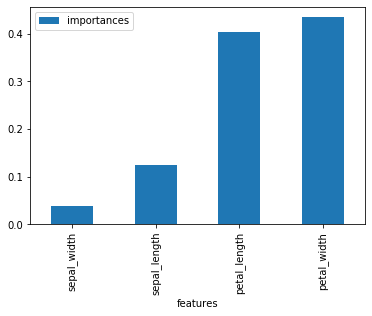

In [81]:
features_importance.plot(kind = 'bar')

- Biểu đồ cho thấy thuộc tính sepal_width và sepal_length ít quan trọng. Ta có thể loại bỏ thuộc tính này.

In [82]:
#X = iris[[ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' ]]
import numpy as np

# Xóa cột 1, 2
X_train = np.array(X_train)
X_train = np.delete(X_train, 0, axis = 1)

In [83]:
X_train = np.delete(X_train, 0, axis = 1)

In [84]:
X_test = np.array(X_test)
X_test = np.delete(X_test, 0, axis = 1)

In [85]:
X_test = np.delete(X_test, 0, axis = 1)

- Chạy lại thuật toán Random Forest với X_train1 và X_test1.

In [86]:
clf = RandomForestClassifier(n_estimators = 10)

clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)

In [87]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


## K-nearest neighbors

- Thuật toán K-láng giềng gần nhất (KNN)

In [88]:
from sklearn import neighbors as knn

clf = knn.KNeighborsClassifier(n_neighbors = 10, p = 2) # n_neighbors: số điểm lân cận
clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)

In [89]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [90]:
y_pred

array([0, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 1, 2, 2, 0, 2, 1, 2,
       0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 1, 2, 0, 2,
       0], dtype=int64)

Text(0, 0.5, 'sepal width (cm)')

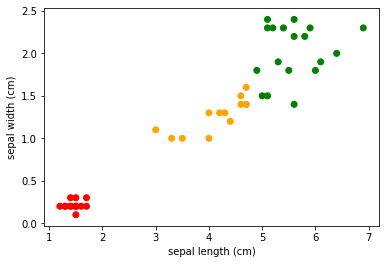

In [91]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['red', 'orange','green'])
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test.values.ravel(), cmap = cmap_bold)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'sepal width (cm)')

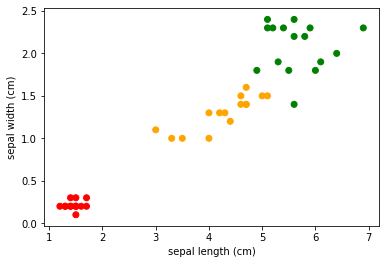

In [92]:
cmap_bold = ListedColormap(['red', 'orange','green'])
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred, cmap = cmap_bold)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

# Bài tập

- Tiếp tục với ví dụ, sinh viên tự cài đặt các thuật toán phân lớp đã được học.
- Áp dụng đối với dữ liệu tai nạn tàu Titanic.